# Introduction to Image Processing

Mojdeh Rastgoo - Guillaume Lemaitre - Desire Sidibe

## **Spatial Filtering and de-noising**

The modules which are commonly used are entered in the following cell.

In [77]:
%matplotlib inline
#%pprint off

# Matplotlib library
import matplotlib.pyplot as plt
from matplotlib import cm

# Numpy library
import numpy as np

from skimage import io 
from skimage.filters.rank import mean
from skimage import img_as_ubyte
from skimage import img_as_float
from skimage.morphology import disk
from skimage import color 

# import the function to add some noise
from skimage.util import random_noise


%matplotlib inline
#%pprint off

# Matplotlib library
import matplotlib.pyplot as     plt
from   matplotlib        import cm

# Numpy library
import numpy as np

from skimage import io 
from skimage import img_as_ubyte
from skimage import img_as_float
from skimage import color 
from skimage import filters
from skimage import transform
from skimage import feature
from skimage import morphology
from scipy   import ndimage

# import the function to add some noise
from skimage.util import random_noise


## Smoothing

### Mean filter 
Smooth the lena image, by mean filter, using different disk circles with radius of $ r = 1, 3, 5, 7$

Use [`skimage.filter.rank.mean`](http://scikit-image.org/docs/dev/api/skimage.filters.rank.html#skimage.filters.rank.mean) and [`skimage.morphology.disk`](http://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.disk) function 

D:\Anaconda3\lib\site-packages\skimage\util\dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


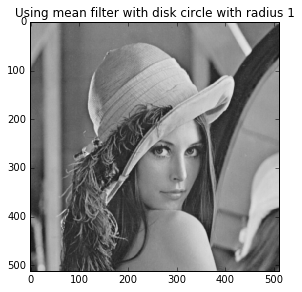

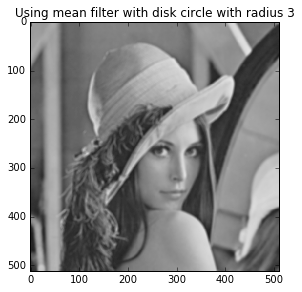

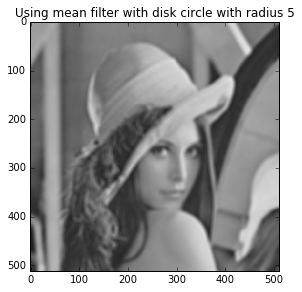

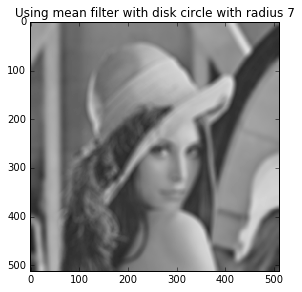

In [78]:
lena_image = io.imread('./images/lena-grey.bmp')
lena_image = img_as_float(lena_image)
##smoothing with different radius disk circles and mean filter
mean_1 = mean(lena_image, disk(1))
mean_3 = mean(lena_image, disk(3)) 
mean_5 = mean(lena_image, disk(5))
mean_7 = mean(lena_image, disk(7))
##Showing output images
io.imshow(mean_1)
plt.title('Using mean filter with disk circle with radius 1')

plt.figure()
io.imshow(mean_3)
plt.title('Using mean filter with disk circle with radius 3')

plt.figure()
io.imshow(mean_5)
plt.title('Using mean filter with disk circle with radius 5')

plt.figure()
io.imshow(mean_7)
plt.title('Using mean filter with disk circle with radius 7')








### Filtering using convolution 
Once again apply the mean fiter, howver instead of using `filter.rank` make your mean mask having the same size as the last filter you applied and use convolution to apply the filter. 

The function [`ndimage.filters.convolve`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.filters.convolve.html#scipy.ndimage.filters.convolve) from `scipy` allows to compute the convolution between a mask (filter) and an image.

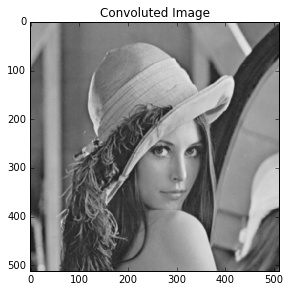

In [79]:
from scipy import signal
##initializing a mask 
mask = np.ones([3,3])/9
##performing convolution
lena_convolution = ndimage.filters.convolve(lena_image, mask)
##displaying the image
io.imshow(lena_convolution)
plt.title('Convoluted Image')

Any filtering will work is a similar manner. Only the mask (filter) will change and will define the nature of the filtering.

### Common spatial filtering

In this section, you will learn about spatial filters which are commonly used in image processing. These filters were already implemented in `skimage` and can be directly used without applying the previous processing.

The modules `filters` and `filters.rank` implement well known filters.

In [80]:
from skimage import filters

#####  First-order edge detector

You already saw during the lecture the following edge detectors: (i) Roberts, (ii) Prewitt, and (iii) Sobel.
All these operators are an approximation of the first derivative. They are highly sensitive to noise even if Prewitt and Sobel have a smoothing process embedded.

Scharr opearator as an improved version of Sobel such that the operator provides a rotational symmetry.

The following functions are defined in `skimage`: `filters.roberts`, `filters.prewitt`, `filters.sobel`, and `filters.scharr`. 

**Apply these different filters on Leaves image (`leaves.jpg`).**

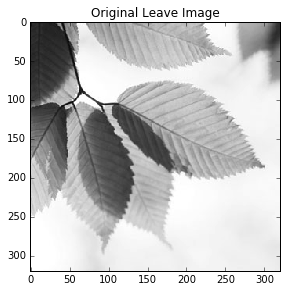

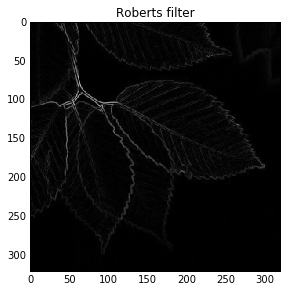

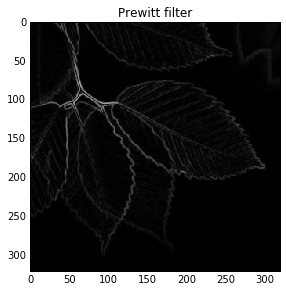

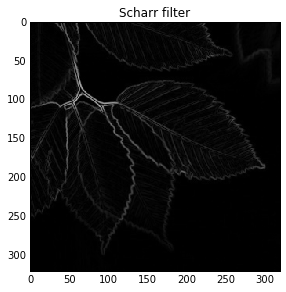

In [81]:
leaves_image = io.imread('./images/leaves.jpg')
from skimage import color
leaves_image = color.rgb2gray(leaves_image);
##Applying roberts, prewitt and scharr filters
leaves_roberts = filters.roberts(leaves_image)

leaves_prewitt = filters.prewitt(leaves_image)

leaves_scharr = filters.scharr(leaves_image)

##showing output
plt.figure()
io.imshow(leaves_image)
plt.title('Original Leave Image')

plt.figure()
io.imshow(leaves_roberts)
plt.title('Roberts filter')

plt.figure()
io.imshow(leaves_prewitt)
plt.title('Prewitt filter')

plt.figure()
io.imshow(leaves_scharr)
plt.title('Scharr filter')


##### Second-order edge detector

The second order edge detector is using the Laplace kernel as seen in lectures.

The `skimage` toolbox does not provide any implementation of this filter (yet). The `scipy` toolbox, however, does through the function `ndimage.filters.laplace`.

**Apply this filter on the Leaves image.**

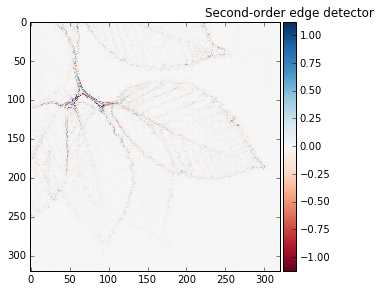

In [82]:
##Applying laplace filter and showing it
leaves_laplace = ndimage.filters.laplace(leaves_image)
plt.figure
io.imshow(leaves_laplace)
plt.title('Second-order edge detector')

## Denoising filters

Different filters can be applied in the spatial domain to remove the noise.
These filters can be found in the module `filters.rank`.

Before to start denoising the image, we need to generate some corrupted image using the noise generator from `skimage`.
For this purpose, we will use the function `util.random_noise`.

**Generate corrupted some Lena images with gaussian noise, salt & peppers noise, and speckle noise. Keep the default parameters.**

In [83]:
from skimage import util

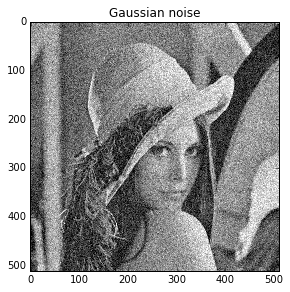

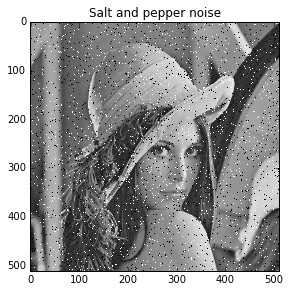

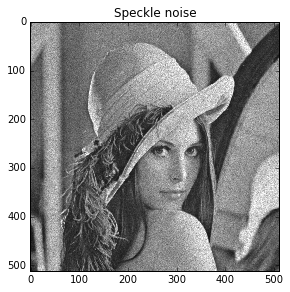

In [84]:

# Corrupt Lena
lena_gaussian = util.random_noise(lena_im, mode='gaussian')
lena_sp = util.random_noise(lena_im, mode='s&p')
lena_speckle = util.random_noise(lena_im, mode='speckle')

# Show the different corrupted Lena
plt.figure()
io.imshow(lena_gaussian)
plt.title('Gaussian noise')          
plt.figure()
io.imshow(lena_sp)
plt.title('Salt and pepper noise')
plt.figure()
io.imshow(lena_speckle)
plt.title('Speckle noise')

**Apply `median`, `mean` and `alpha-trimmed` mean filter on different corrupted Lena images with the mask corresponding to disk 1 and 3.**

 `alpha-trimmed` ([`mean_percentile`](http://scikit-image.org/docs/dev/api/skimage.filters.rank.html#skimage.filters.rank.mean_percentile)) mean filter works similar to normal mean filter. However, it considers only the grey values inside a specific range.

** mean filter: ** 

D:\Anaconda3\lib\site-packages\skimage\util\dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


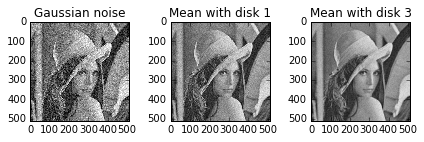

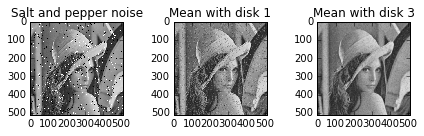

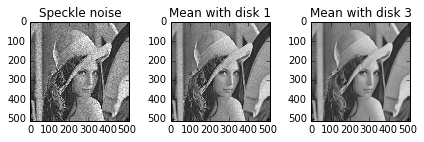

In [85]:
##applying mean filters and showing the images in subplot for three kinds of noisy images

mean_gaussian1 = mean(lena_gaussian, disk(1))
mean_gaussian3 = mean(lena_gaussian, disk(3))

mean_sp1 = mean(lena_sp, disk(1))
mean_sp3 = mean(lena_sp, disk(3))

mean_speck1 = mean(lena_speckle, disk(1))
mean_speck3 = mean(lena_speckle, disk(3))

plt.figure() 
plt.subplot(1,3,1)
plt.title('Gaussian noise')
io.imshow(lena_gaussian)
plt.subplot(1,3,2)
plt.title('Mean with disk 1')
io.imshow(mean_gaussian1)
plt.subplot(1,3,3)
plt.title('Mean with disk 3')
io.imshow(mean_gaussian3)

plt.figure()
plt.subplot(1,3,1)
plt.title('Salt and pepper noise')
io.imshow(lena_sp)
plt.subplot(1,3,2)
plt.title('Mean with disk 1')
io.imshow(mean_sp1)
plt.subplot(1,3,3)
plt.title('Mean with disk 3')
io.imshow(mean_sp3)

plt.figure()
plt.subplot(1,3,1)
plt.title('Speckle noise')
io.imshow(lena_speckle)
plt.subplot(1,3,2)
plt.title('Mean with disk 1')
io.imshow(mean_speck1)
plt.subplot(1,3,3)
plt.title('Mean with disk 3')
io.imshow(mean_speck3)

** alpha-trimmed mean filter: **

Apply this function on the different corrupted Lena by considering the gray value in the range [0.05, 0.95].

D:\Anaconda3\lib\site-packages\skimage\util\dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


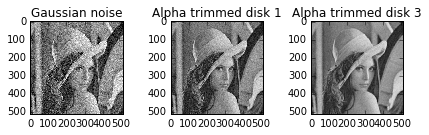

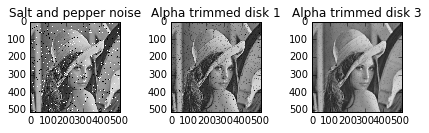

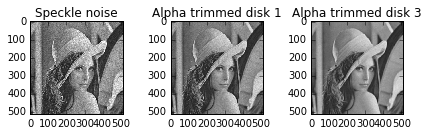

In [86]:
##applying alpha trimmed mean filters and showing the images in subplot for three kinds of noisy images

alphatrimmed_gaussian1= filters.rank.mean_percentile(lena_gaussian, morphology.disk(1), p0=0.05, p1=0.95)
alphatrimmed_gaussian3 = filters.rank.mean_percentile(lena_gaussian, morphology.disk(3), p0=0.05, p1=0.95)

#Salt and pepper noise
alphatrimmed_sp1 = filters.rank.mean_percentile(lena_sp, morphology.disk(1), p0=0.05, p1=0.95)
alphatrimmed_sp3 = filters.rank.mean_percentile(lena_sp, morphology.disk(3), p0=0.05, p1=0.95)

#Speckle noise
alphatrimmed_speckle1 = filters.rank.mean_percentile(lena_speckle, morphology.disk(1), p0=0.05, p1=0.95)
alphatrimmed_speckle3 = filters.rank.mean_percentile(lena_speckle, morphology.disk(3), p0=0.05, p1=0.95)


plt.figure() 
plt.subplot(1,3,1)
plt.title('Gaussian noise')
io.imshow(lena_gaussian)
plt.subplot(1,3,2)
plt.title('Alpha trimmed disk 1')
io.imshow(alphatrimmed_gaussian1)
plt.subplot(1,3,3)
plt.title('Alpha trimmed disk 3')
io.imshow(alphatrimmed_gaussian3)

plt.figure()
plt.subplot(1,3,1)
plt.title('Salt and pepper noise')
io.imshow(lena_sp)
plt.subplot(1,3,2)
plt.title('Alpha trimmed disk 1')
io.imshow(alphatrimmed_sp1)
plt.subplot(1,3,3)
plt.title('Alpha trimmed disk 3')
io.imshow(alphatrimmed_sp3)

plt.figure()
plt.subplot(1,3,1)
plt.title('Speckle noise')
io.imshow(lena_speckle)
plt.subplot(1,3,2)
plt.title('Alpha trimmed disk 1')
io.imshow(alphatrimmed_speckle1)
plt.subplot(1,3,3)
plt.title('Alpha trimmed disk 3')
io.imshow(alphatrimmed_speckle3)

** median filter: **

D:\Anaconda3\lib\site-packages\skimage\util\dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


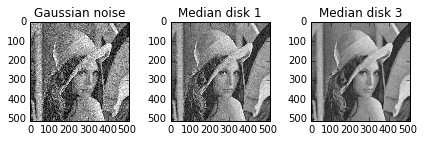

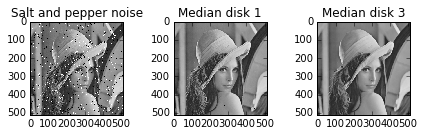

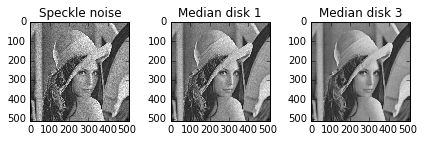

In [87]:
##applying median filters and showing the images in subplot for three kinds of noisy images

from scipy import ndimage

median_gaussian1 = filters.rank.median(lena_gaussian, morphology.disk(1))
median_gaussian3= filters.rank.median(lena_gaussian, morphology.disk(3))

median_sp1 = filters.rank.median(lena_sp, morphology.disk(1))
median_sp3 = filters.rank.median(lena_sp, morphology.disk(3))

median_speckle1 = filters.rank.median(lena_speckle, morphology.disk(1))
median_speckle3 = filters.rank.median(lena_speckle, morphology.disk(3))


plt.figure() 
plt.subplot(1,3,1)
plt.title('Gaussian noise')
io.imshow(lena_gaussian)
plt.subplot(1,3,2)
plt.title('Median disk 1')
io.imshow(median_gaussian1)
plt.subplot(1,3,3)
plt.title('Median disk 3')
io.imshow(median_gaussian3)

plt.figure()
plt.subplot(1,3,1)
plt.title('Salt and pepper noise')
io.imshow(lena_sp)
plt.subplot(1,3,2)
plt.title('Median disk 1')
io.imshow(median_sp1)
plt.subplot(1,3,3)
plt.title('Median disk 3')
io.imshow(median_sp3)

plt.figure()
plt.subplot(1,3,1)
plt.title('Speckle noise')
io.imshow(lena_speckle)
plt.subplot(1,3,2)
plt.title('Median disk 1')
io.imshow(median_speckle1)
plt.subplot(1,3,3)
plt.title('Median disk 3')
io.imshow(median_speckle3)

## Sharpening

Use the `railway` image and sharpen the image using laplacian fitering.

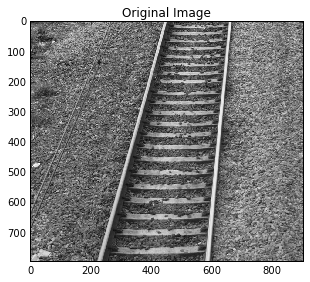

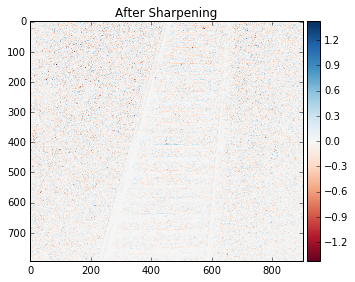

In [88]:
##Importing railway picture and sharpening it with laplacian filtering 

railway_image = io.imread(('./images/railway.jpg'), as_grey=True)
plt.figure()
plt.title('Original Image')
io.imshow(railway_image)
railway_laplace = ndimage.filters.laplace(railway_image)
plt.figure()
plt.title('After Sharpening')
io.imshow(railway_laplace)

## Hough transform

** Define your Hough_trans function which finds the lines within an image** 

you can use either `hough_line` and `hough_line_peaks` or `probabilistic_hough_line` from [`skimage.transform`](http://scikit-image.org/docs/dev/api/skimage.transform.html). 

search a bit to know the difference between `probablistic_hough_line` and `hough_line`

Or `HoughLines` and `HoughLinesP` from [`cv2`](http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_tutorials.html)


Test your function on `railway` and `building` images. 

**Note : use `skimage.feature.canny` (`cv2.canny`) edge detector to find the primary edges**

In [89]:
##Defining Hough transform function
def hough_transform(image):
  
    edges = feature.canny(image, 4)    
    lines = transform.probabilistic_hough_line(edges, line_length=5, line_gap=3)
    
    plt.figure
    io.imshow(image)
    plt.title('Detected Edges')
    
    for i in range(0, len(lines)-1):
        x1 = lines[i][0][0]
        y1 = lines[i][0][1]
        x2 = lines[i][1][0]
        y2 = lines[i][1][1]
        plt.plot([x1, x2], [y1, y2], '-b')
        
    plt.show()
    
    return lines

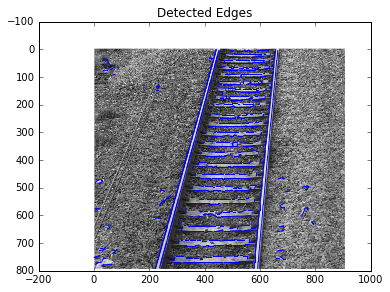

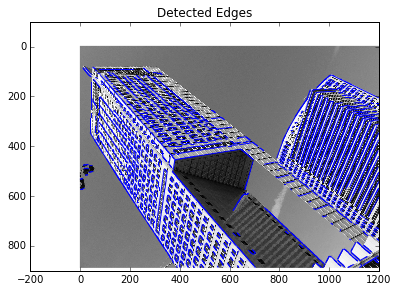

In [90]:
##applying hough transformation of railway and bulding 
railway_houghtransform = hough_transform(railway_image)

building_image = io.imread(('./images/building.jpg'), as_grey=True)
building_houghtransform = hough_transform(building_image)